<br><br><br><br><br><br><br><br><br><br><br><br><br>

<table>
    <tr>
        <td rowspan=3><img src="https://raw.githubusercontent.com/censusdis/censusdis-tutorial-2024/c49dd03ee1a2694acff36f7291050312aa1243d3/images/github-lesson0.png"></img></td>
        <td style="font-size:2em; vertical-align:top">Working with U.S. Census Data in Python: Extended Abstract</td>
    </tr>
    <tr>
    </tr>
    <tr>
        <td style="font-size:1.5em; vertical-align:top">
            <a href="https://www.linkedin.com/in/vengroff/">Darren Erik Vengroff, Ph.D.</a>
            <br>
            Creator and principal maintainer of <a href="https://github.com/censusdis/censusdis">censusdis</a>.
        </td>
    </tr>
</table>

<br><br><br><br><br><br><br><br><br><br><br><br><br>

This notebook is a shorter overview of some of the main content in [Lesson 1](./Lesson%200%20Introduction.ipynb), [Lesson 2](./Lesson%202%20Maps.ipynb), [Lesson 3](./Lesson%203%20Variables.ipynb) and [Lesson 5](./Lesson%205%20Advanced%20Geography.ipynb).

This notebook is designed to present the material in a shorter and less interactive way than the
original full lesssons, exercises, and projects.

If you would like to run this notebook, we suggest you first look at [Lesson 0](./Lesson%200%20Introduction.ipynb) and are set up as it suggests.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

# Background

- The U.S. Census Bureau collects and publishes data on all kinds of demographic, social, economic, and political aspects of American life.
- The vast majority of this data is available via a web-based API.
- We'd like it to be easy for Python users to access this API.

- That is exactly what the [`censusdis`](https://github.com/censusdis/censusdis) package does. 
From the `censusdis` README.md:

> `censusdis` is a package for discovering, loading, analyzing, and computing diversity, integration, and
> segregation metrics to U.S. Census demographic data. 
> It is designed
> 
> - to support **every dataset**, **every geography, and every year**. It's not just about ACS data through
>   the last time the software was updated and released;
> - to support **all geographies, on and off-spine**, not just states, counties, and census tracts;
> - to have **integrated mapping capabilities** that save you time and extra coding;
> - to be intuitive, Pythonic, and fast.

- It doesn't matter if you don't know what those **bold terms** even mean.
  - This tutorial will teach you.
  - The full multi-lesson version is a hands-on tutorial, all in notebooks, and you will have plenty of opportunity to write code to
    do all the things you will learn.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

## Imports

Import some basic components of `censusdis` and related packages.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem

from censusdis.datasets import ACS5, CBP, DECENNIAL_PUBLIC_LAW_94_171

import censusdis.states as states

from censusdis import CensusApiException

from matplotlib.ticker import FuncFormatter

import pandas as pd

# Some columns will be wide and we want to see their full contents.
pd.set_option("max_colwidth", 200)

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

# Agenda

1. Data Queries
2. Adding Geometry and Plotting Maps
3. Metadata and Discovery
4. Advanced Geography
5. Q&A

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

# Part 1: Data Queries

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

## Query Basics

Every query needs at least four pieces of information.

1. The dataset. We will start wih the American Community Survey.
2. The vintage, or year, of the data we want to query. We will use 2022.
3. The variables we want to query. We'll start with median income.
4. The geography or geographies we want to query data for. Since we are in Washington State, we'll
   do our first query for Washington State.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

<br>
The ACS consists of thousands of variables. The one we want is median household income.
It is called `B19013_001E`. Later on, we will talk about how we find variables like this.

In [2]:
# See https://api.census.gov/data/2020/acs/acs5/variables/B19013_001E.html
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Our first query

In [3]:
df_wa_income = ced.download(
    # Data set: American Community Survey 5-Year
    dataset=ACS5,
    # Vintage: 2022
    vintage=2022,
    # Variable: median household income
    download_variables=MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    # Geography: Washington State
    state=states.WA,
)

In [4]:
df_wa_income

STATE  B19013_001E
0    53        90325

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Extending our Query to More than One State

We don't have to limit our queries to just a single geography.

We can query several states at onece.

In [5]:
df_west_coast_income = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    # Three states this time.
    state=[states.WA, states.OR, states.CA],
)

df_west_coast_income

STATE  B19013_001E
0    06        91905
1    41        76632
2    53        90325

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Extension: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [6]:
df_west_coast_income = ced.download(
    dataset=ACS5,
    vintage=2022,
    # Name and median household income
    download_variables=["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    state=[states.WA, states.OR, states.CA],
)

df_west_coast_income

STATE        NAME  B19013_001E
0    06  California        91905
1    41      Oregon        76632
2    53  Washington        90325

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Extension: All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [7]:
df_all_states = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # Wild card for all the states
    state="*",
)

df_all_states

STATE                  NAME  B19013_001E
0     01               Alabama        59609
1     02                Alaska        86370
2     04               Arizona        72581
3     05              Arkansas        56335
4     06            California        91905
5     08              Colorado        87598
6     09           Connecticut        90213
7     10              Delaware        79325
8     11  District of Columbia       101722
9     12               Florida        67917
10    13               Georgia        71355
11    15                Hawaii        94814
12    16                 Idaho        70214
13    17              Illinois        78433
14    18               Indiana        67173
15    19                  Iowa        70571
16    20                Kansas        69747
17    21              Kentucky        60183
18    22             Louisiana        57852
19    23                 Maine        68251
20    24              Maryland        98461
21    25         Massachusetts        96505
22    26              Michigan        68505
23    27             Minnesota        84313
24    28           Mississippi        52985
25    29              Missouri        65920
26    30               Montana        66341
27    31              Nebraska        71722
28    32                Nevada        71646
29    33         New Hampshire        90845
30    34            New Jersey        97126
31    35            New Mexico        58722
32    36              New York        81386
33    37        North Carolina        66186
34    38          North Dakota        73959
35    39                  Ohio        66990
36    40              Oklahoma        61364
37    41                Oregon        76632
38    42          Pennsylvania        73170
39    44          Rhode Island        81370
40    45        South Carolina        63623
41    46          South Dakota        69457
42    47             Tennessee        64035
43    48                 Texas        73035
44    49                  Utah        86833
45    50               Vermont        74014
46    51              Virginia        87249
47    53            Washington        90325
48    54         West Virginia        55217
49    55             Wisconsin        72458
50    56               Wyoming        72495
51    72           Puerto Rico        24002

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

# Part 2: Adding Geometry and Plotting Maps

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [8]:
gdf_all_states = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    state="*",
    # We want the geometry of the states too:
    with_geometry=True,
)

gdf_all_states.head()

STATE           NAME  B19013_001E  \
0    42   Pennsylvania        63627   
1    06     California        78672   
2    54  West Virginia        48037   
3    49           Utah        74197   
4    36       New York        71117   

                                                                                                                                                                                                  geometry  
0  POLYGON ((-80.51989 40.90666, -80.51963 40.91142, -80.51909 40.92106, -80.51909 40.9216, -80.51905 40.95336, -80.51905 40.95336, -80.51904 40.95873, -80.519 40.98738, -80.51899 40.99411, -80.51899...  
1  MULTIPOLYGON (((-118.60442 33.47855, -118.59878 33.47794, -118.58594 33.47382, -118.58026 33.4751, -118.57035 33.47531, -118.5576 33.47472, -118.54453 33.47412, -118.53862 33.47702, -118.53428 33....  
2  POLYGON ((-82.6432 38.16909, -82.643 38.16956, -82.63905 38.17111, -82.62546 38.17049, -82.61943 38.16903, -82.61602 38.16972, -82.61349 38.17024, -82.61241 38.1709, -82.61134 38.17155, -82.60959 ...  
3  POLYGON ((-114.05296 37.59278, -114.05247 37.60478, -114.05231 37.63632, -114.05184 37.72404, -114.05173 37.746, -114.05178 37.74625, -114.05167 37.74696, -114.05111 37.75628, -114.04992 37.76559,...  
4  MULTIPOLYGON (((-79.76215 42.24305, -79.76196 42.25135, -79.76195 42.26933, -79.76195 42.26986, -79.74351 42.27526, -79.73892 42.2766, -79.73711 42.2773, -79.71782 42.28471, -79.71406 42.2862, -79...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

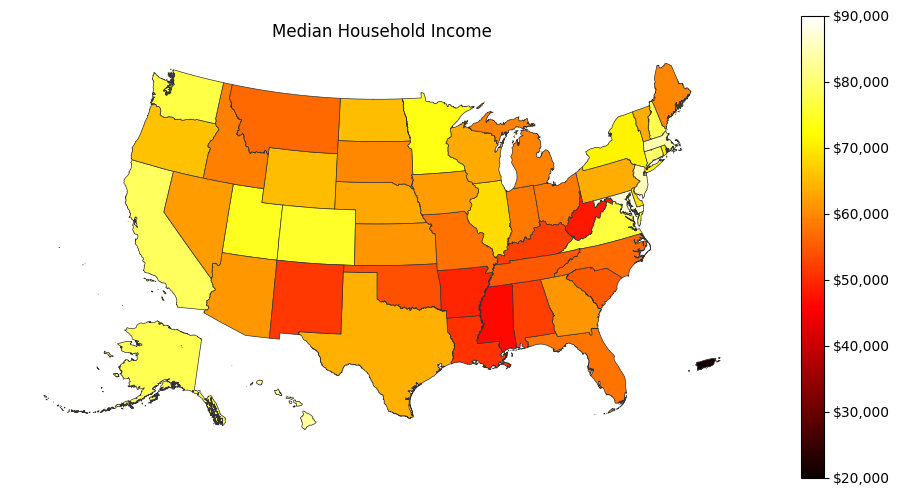

In [9]:
ax = cem.plot_us(
    gdf_all_states,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    # Styling with Matplotlib **kwargs
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=90_000,
    legend=True,
    figsize=(12, 6),
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
)

ax.set_title("Median Household Income")
_ = ax.axis("off")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## What other Geographies are Available?

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

We choose the state but use the wildcard `county='*'`.

In [10]:
gdf_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=[MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # All the counties in Washington State.
    state=states.WA,
    county="*",
    with_geometry=True,
)

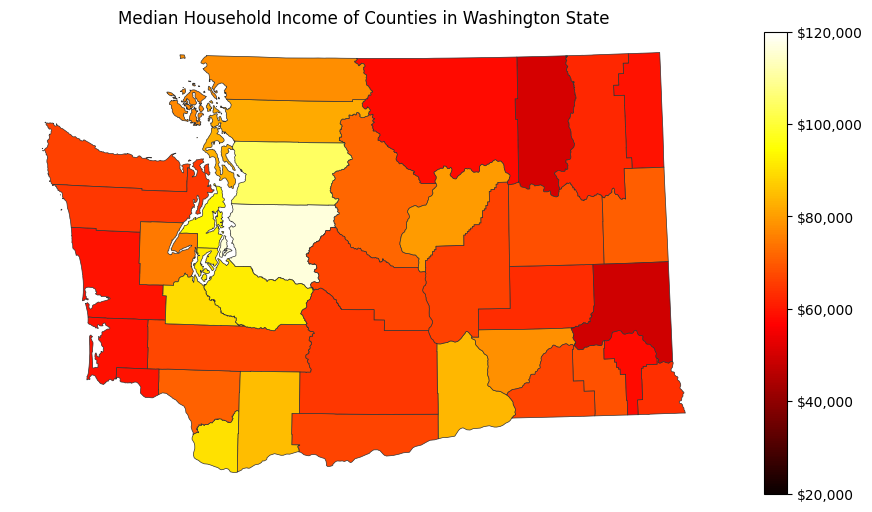

In [11]:
ax = cem.plot_map(
    # Counties
    gdf_counties,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=120_000,
    legend=True,
    figsize=(12, 6),
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
)

ax.set_title("Median Household Income of Counties in Washington State")
_ = ax.axis("off")

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### We are interested in Pierce County

In [12]:
from censusdis.counties.washington import PIERCE

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts

- Tracts typically have 1-5,000 residents
- There are ~80,000 tracts in the U.S.

In [13]:
gdf_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=[MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # All the census tracts in Pierce County
    state=states.WA,
    county=PIERCE,
    tract="*",
    with_geometry=True,
)

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Background Maps

- Add context and make maps more user friendly.

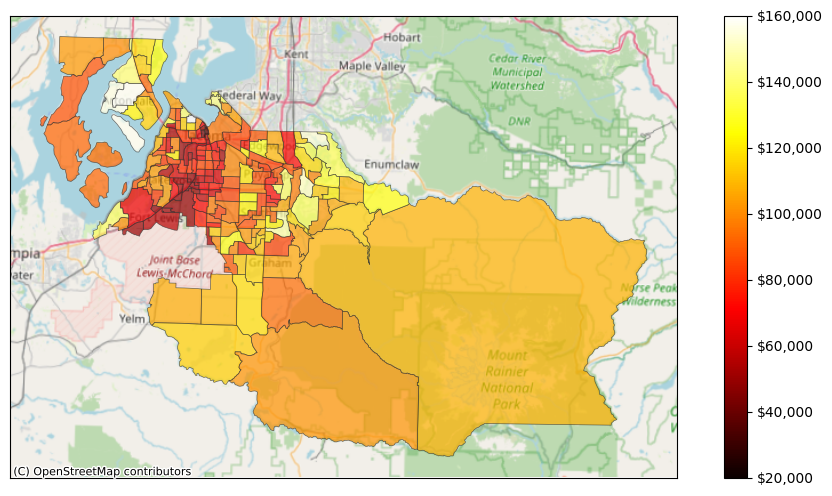

In [14]:
ax = cem.plot_map(
    # Tracts
    gdf_tracts,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=160_000,
    legend=True,
    figsize=(12, 6),
    alpha=0.7,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    # We can add a background to any map with
    # this optional argument.
    with_background=True,
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *State - County - Tract - Block Group - Block*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

![Census Geographies](../images/census_geos.png)

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Places in Washington State

- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [15]:
gdf_wa_places = ced.download(
    ACS5,
    2022,
    ["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # Query all places in Washington State.
    state=states.WA,
    place="*",
    with_geometry=True,
)

gdf_wa_places.head()

STATE  PLACE                              NAME  B19013_001E  \
0    53  00100         Aberdeen city, Washington      50008.0   
1    53  00135  Aberdeen Gardens CDP, Washington          NaN   
2    53  00275              Acme CDP, Washington          NaN   
3    53  00380              Addy CDP, Washington          NaN   
4    53  00800           Ahtanum CDP, Washington      81354.0   

                                                                                                                                                                                                  geometry  
0  MULTIPOLYGON (((-123.69688 47.01895, -123.69662 47.01967, -123.69676 47.02033, -123.6936 47.01978, -123.69048 47.01851, -123.68284 47.01843, -123.68285 47.01641, -123.68628 47.01639, -123.6863 47....  
1  POLYGON ((-123.7956 47.05004, -123.78966 47.05652, -123.78832 47.06084, -123.78531 47.0631, -123.78267 47.06374, -123.78045 47.06604, -123.77875 47.06841, -123.77708 47.06939, -123.77354 47.07028,...  
2  POLYGON ((-122.22005 48.72737, -122.21972 48.7311, -122.21779 48.7312, -122.21749 48.73387, -122.2122 48.73404, -122.21361 48.7318, -122.21263 48.72994, -122.21118 48.72934, -122.20606 48.72973, -...  
3  POLYGON ((-117.84418 48.36747, -117.83758 48.36769, -117.83496 48.35856, -117.83205 48.35859, -117.83204 48.35575, -117.83012 48.35573, -117.83008 48.35212, -117.83378 48.35214, -117.84095 48.3521...  
4  POLYGON ((-120.67102 46.5511, -120.66386 46.55231, -120.65927 46.55417, -120.64983 46.55622, -120.64958 46.5639, -120.64647 46.56392, -120.64635 46.5821, -120.64238 46.58207, -120.63057 46.58208, ...

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

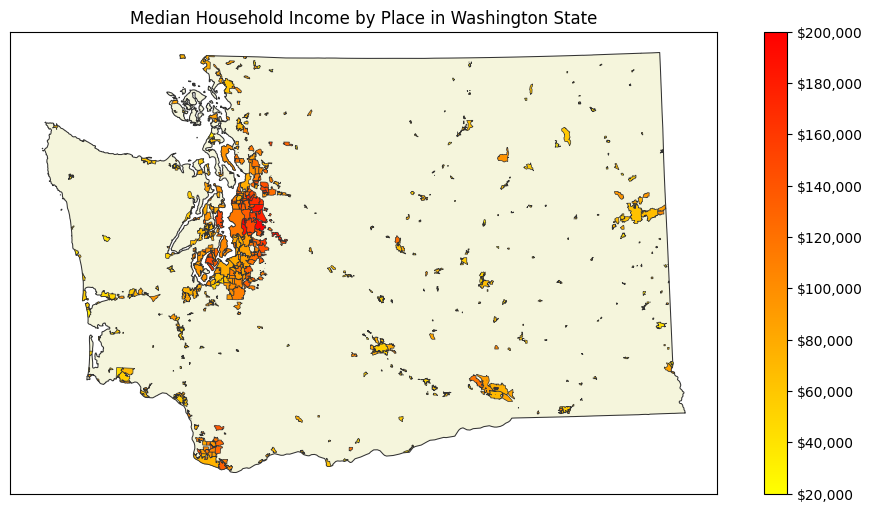

In [16]:
# Plot the whole state in a background color.
gdf_wa_state = ced.download(
    ACS5,
    2022,
    ["NAME"],
    state=states.WA,
    with_geometry=True,
)

ax = cem.plot_map(
    gdf_wa_state, linewidth=0.75, color="beige", edgecolor="#333", figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_wa_places,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="autumn_r",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=200_000,
    figsize=(12, 6),
    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    ax=ax,
)

ax.set_title("Median Household Income by Place in Washington State")
None

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

# Part 3: Metadata and Discovery

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

## Data sets come in all different shapes and sizes

### The ACS5 has 1,140 group and 27,889 variables

There is a reason this data set is so popular. It has all kinds of different
social, racial, ethnic, and economic data about individuals and groups.

In [17]:
ced.variables.search_groups(ACS5, 2020)

DATASET  YEAR    GROUP  \
0     acs/acs5  2020   B01001   
1     acs/acs5  2020  B01001A   
2     acs/acs5  2020  B01001B   
3     acs/acs5  2020  B01001C   
4     acs/acs5  2020  B01001D   
...        ...   ...      ...   
1135  acs/acs5  2020   C27014   
1136  acs/acs5  2020   C27016   
1137  acs/acs5  2020   C27017   
1138  acs/acs5  2020   C27018   
1139  acs/acs5  2020   C27021   

                                                                                            DESCRIPTION  
0                                                                                            SEX BY AGE  
1                                                                              SEX BY AGE (WHITE ALONE)  
2                                                          SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)  
3                                                  SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)  
4                                                                              SEX BY AGE (ASIAN ALONE)  
...                                                                                                 ...  
1135                                                         PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE  
1136  HEALTH INSURANCE COVERAGE STATUS BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE  
1137          PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE  
1138           PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE  
1139                                            HEALTH INSURANCE COVERAGE STATUS  BY LIVING ARRANGEMENT  

[1140 rows x 4 columns]

In [18]:
ced.variables.search(ACS5, 2020)

YEAR   DATASET GROUP   VARIABLE      LABEL  SUGGESTED_WEIGHT VALUES
0      2020  acs/acs5   N/A     AIANHH  Geography               NaN   None
1      2020  acs/acs5   N/A      AIARO  Geography               NaN   None
2      2020  acs/acs5   N/A     AIHHTL  Geography               NaN   None
3      2020  acs/acs5   N/A      AIRES  Geography               NaN   None
4      2020  acs/acs5   N/A       ANRC  Geography               NaN   None
...     ...       ...   ...        ...        ...               ...    ...
27884  2020  acs/acs5   N/A      TRACT  Geography               NaN   None
27885  2020  acs/acs5   N/A  TRISUBREM  Geography               NaN   None
27886  2020  acs/acs5   N/A     TTRACT  Geography               NaN   None
27887  2020  acs/acs5   N/A         UA  Geography               NaN   None
27888  2020  acs/acs5   N/A       ZCTA  Geography               NaN   None

[27889 rows x 7 columns]

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### The decennial public law data set is much smaller

This is a narrowly focused data set designed specifically to help states
manage congressional district boundaries.

It contains only 6 groups and a total of 335 variables.

In [19]:
ced.variables.search_groups(DECENNIAL_PUBLIC_LAW_94_171, 2020)

DATASET  YEAR GROUP  \
0  dec/pl  2020    H1   
1  dec/pl  2020    P1   
2  dec/pl  2020    P2   
3  dec/pl  2020    P3   
4  dec/pl  2020    P4   
5  dec/pl  2020    P5   

                                                                                   DESCRIPTION  
0                                                                             OCCUPANCY STATUS  
1                                                                                         RACE  
2                                       HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE  
3                                                    RACE FOR THE POPULATION 18 YEARS AND OVER  
4  HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE FOR THE POPULATION 18 YEARS AND OVER  
5                                       GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE

In [20]:
ced.variables.search(DECENNIAL_PUBLIC_LAW_94_171, 2020)

YEAR DATASET GROUP   VARIABLE               LABEL  SUGGESTED_WEIGHT  \
0    2020  dec/pl   N/A     AIANHH           Geography               NaN   
1    2020  dec/pl   N/A     AIHHTL           Geography               NaN   
2    2020  dec/pl   N/A      AIRES           Geography               NaN   
3    2020  dec/pl   N/A       ANRC           Geography               NaN   
4    2020  dec/pl   N/A     BLKGRP           Geography               NaN   
..    ...     ...   ...        ...                 ...               ...   
330  2020  dec/pl   N/A     SUBMCD           Geography               NaN   
331  2020  dec/pl   N/A   SUMLEVEL  Summary Level code               NaN   
332  2020  dec/pl   N/A      TRACT           Geography               NaN   
333  2020  dec/pl   N/A  TRISUBREM           Geography               NaN   
334  2020  dec/pl   N/A        VTD           Geography               NaN   

    VALUES  
0     None  
1     None  
2     None  
3     None  
4     None  
..     ...  
330   None  
331   None  
332   None  
333   None  
334   None  

[335 rows x 7 columns]

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### The county business patterns (CBP) data set has a very narrow focus

It has a single group with just 25 variables. But they encode some tremendously
important data about business activity at the county level.

In [21]:
ced.variables.search_groups(CBP, 2020)

DATASET  YEAR      GROUP  \
0     cbp  2020  CB2000CBP   

                                                                                                                                                                                 DESCRIPTION  
0  All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2020

In [22]:
ced.variables.search(CBP, 2020)

YEAR DATASET      GROUP   VARIABLE  \
0   2020     cbp        N/A       CBSA   
1   2020     cbp        N/A         CD   
2   2020     cbp        N/A     COUNTY   
3   2020     cbp        N/A        CSA   
4   2020     cbp  CB2000CBP        EMP   
5   2020     cbp  CB2000CBP    EMPSZES   
6   2020     cbp  CB2000CBP      EMP_N   
7   2020     cbp  CB2000CBP      ESTAB   
8   2020     cbp        N/A    GEOCOMP   
9   2020     cbp  CB2000CBP     GEO_ID   
10  2020     cbp        N/A   INDGROUP   
11  2020     cbp        N/A   INDLEVEL   
12  2020     cbp  CB2000CBP        LFO   
13  2020     cbp  CB2000CBP  NAICS2017   
14  2020     cbp        N/A     NATION   
15  2020     cbp  CB2000CBP     PAYANN   
16  2020     cbp  CB2000CBP   PAYANN_N   
17  2020     cbp  CB2000CBP    PAYQTR1   
18  2020     cbp  CB2000CBP  PAYQTR1_N   
19  2020     cbp        N/A     SECTOR   
20  2020     cbp        N/A      STATE   
21  2020     cbp        N/A  SUBSECTOR   
22  2020     cbp        N/A   SUMLEVEL   
23  2020     cbp  CB2000CBP       YEAR   
24  2020     cbp        N/A    ZIPCODE   

                                     LABEL  SUGGESTED_WEIGHT  \
0                                Geography               NaN   
1                                Geography               NaN   
2                                Geography               NaN   
3                                Geography               NaN   
4                      Number of employees               NaN   
5   Employment size of establishments code               NaN   
6      Noise range for number of employees               NaN   
7                 Number of establishments               NaN   
8                         GEO_ID Component               NaN   
9               Geographic identifier code               NaN   
10                          Industry group               NaN   
11                          Industry level               NaN   
12         Legal form of organization code               NaN   
13                         2017 NAICS code               NaN   
14                               Geography               NaN   
15                 Annual payroll ($1,000)               NaN   
16          Noise range for annual payroll               NaN   
17          First-quarter payroll ($1,000)               NaN   
18   Noise range for first-quarter payroll               NaN   
19                  NAICS economic sector                NaN   
20                               Geography               NaN   
21                               SUBSECTOR               NaN   
22                      Summary Level code               NaN   
23                                    Year               NaN   
24                               Geography               NaN   

                                                                                                                                                                                                     VALUES  
0                                                                                                                                                                                                      None  
1                                                                                                                                                                                                      None  
2                                                                                                                                                                                                      None  
3                                                                                                                                                                                                      None  
4                                                                                                                                                                                                      None  
5         

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## How do we find the variables we are actually looking for?

We just saw `ced.variables.search` in action, and we will use it again.

In [23]:
# This is a regular expression.

# We're not sure if we are looking for `owner-occupied` or `owner occupied`,
# so let's use a `.` to match any character. And the `$` at the end means
# this should be at the end of the name.
owner_occupied_pattern = r"owner.occupied$"

In [24]:
ced.variables.search(ACS5, 2022, pattern=owner_occupied_pattern)

YEAR   DATASET    GROUP      VARIABLE  \
0   2022  acs/acs5   B17019   B17019_004E   
1   2022  acs/acs5   B17019   B17019_008E   
2   2022  acs/acs5   B17019   B17019_011E   
3   2022  acs/acs5   B17019   B17019_015E   
4   2022  acs/acs5   B17019   B17019_019E   
5   2022  acs/acs5   B17019   B17019_022E   
6   2022  acs/acs5  B25003A  B25003A_002E   
7   2022  acs/acs5  B25003B  B25003B_002E   
8   2022  acs/acs5  B25003C  B25003C_002E   
9   2022  acs/acs5  B25003D  B25003D_002E   
10  2022  acs/acs5  B25003E  B25003E_002E   
11  2022  acs/acs5  B25003F  B25003F_002E   
12  2022  acs/acs5  B25003G  B25003G_002E   
13  2022  acs/acs5  B25003H  B25003H_002E   
14  2022  acs/acs5  B25003I  B25003I_002E   
15  2022  acs/acs5   B25003   B25003_002E   
16  2022  acs/acs5  B25008A  B25008A_002E   
17  2022  acs/acs5  B25008B  B25008B_002E   
18  2022  acs/acs5  B25008C  B25008C_002E   
19  2022  acs/acs5  B25008D  B25008D_002E   
20  2022  acs/acs5  B25008E  B25008E_002E   
21  2022  acs/acs5  B25008F  B25008F_002E   
22  2022  acs/acs5  B25008G  B25008G_002E   
23  2022  acs/acs5  B25008H  B25008H_002E   
24  2022  acs/acs5  B25008I  B25008I_002E   
25  2022  acs/acs5   B25008   B25008_002E   
26  2022  acs/acs5  B25010A  B25010A_002E   
27  2022  acs/acs5  B25010B  B25010B_002E   
28  2022  acs/acs5  B25010C  B25010C_002E   
29  2022  acs/acs5  B25010D  B25010D_002E   
30  2022  acs/acs5  B25010E  B25010E_002E   
31  2022  acs/acs5  B25010F  B25010F_002E   
32  2022  acs/acs5  B25010G  B25010G_002E   
33  2022  acs/acs5  B25010H  B25010H_002E   
34  2022  acs/acs5  B25010I  B25010I_002E   
35  2022  acs/acs5   B25010   B25010_002E   
36  2022  acs/acs5   B25021   B25021_002E   
37  2022  acs/acs5   B25022   B25022_002E   
38  2022  acs/acs5   B25037   B25037_002E   
39  2022  acs/acs5   B25039   B25039_002E   
40  2022  acs/acs5   B25046   B25046_002E   

                                                                                                                                                 LABEL  \
0                                          Estimate!!Total:!!Income in the past 12 months below poverty level:!!Married-couple family:!!Owner occupied   
1           Estimate!!Total:!!Income in the past 12 months below poverty level:!!Other families:!!Male householder, no spouse present:!!Owner occupied   
2         Estimate!!Total:!!Income in the past 12 months below poverty level:!!Other families:!!Female householder, no spouse present:!!Owner occupied   
3                                    Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Married-couple family:!!Owner occupied   
4     Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Other families:!!Male householder, no spouse present:!!Owner occupied   
5   Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Other families:!!Female householder, no spouse present:!!Owner occupied   
6                                                                                                                     Estimate!!Total:!!Owner occupied   
7                                                                                                                     Estimate!!Total:!!Owner occupied   
8                                                                                                                     Estimate!!Total:!!Owner occupied   
9                                                                                                                     Estimate!!Total:!!Owner occupied   
10                                                                                                                    Estimate!!Total:!!Owner occupied   
11                                                                                                                    Estimate!!Total:!!Owner occupied   
12                                                                                                             

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

In [25]:
GROUP = "B25008"

In [26]:
ced.variables.search(ACS5, 2022, group_name=GROUP)

YEAR   DATASET   GROUP     VARIABLE                              LABEL  \
0  2022  acs/acs5  B25008  B25008_001E                   Estimate!!Total:   
1  2022  acs/acs5  B25008  B25008_002E   Estimate!!Total:!!Owner occupied   
2  2022  acs/acs5  B25008  B25008_003E  Estimate!!Total:!!Renter occupied   
3  2022  acs/acs5  B25008       GEO_ID                          Geography   
4  2022  acs/acs5  B25008         NAME               Geographic Area Name   

   SUGGESTED_WEIGHT VALUES  
0               NaN   None  
1               NaN   None  
2               NaN   None  
3               NaN   None  
4               NaN   None

### As a tree

In many groups the variables exist in a tree, implied by the use of `:` and `!` characters in their
labels. It is easier to understand the tree by looking at it directly.

In [27]:
ced.variables.group_tree(ACS5, 2022, group_name=GROUP)

+ Estimate
    + Total: (B25008_001E)
        + Owner occupied (B25008_002E)
        + Renter occupied (B25008_003E)
+ Geography (GEO_ID)
+ Geographic Area Name (NAME)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

# Part 4: Advanced Geography

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

## Can we combine on- and off-spine geometries?

What are all the census tracts in Boston, MA (a place)? It seems like a reasonable
question but the geography hierarchy does not technically allow it to be asked.

In [28]:
from censusdis.places.massachusetts import BOSTON_CITY

In [29]:
try:
    df_boston_tracts = ced.download(
        dataset=ACS5,
        vintage=2020,
        download_variables=["NAME"],
        state=states.MA,
        place=BOSTON_CITY,
        tract="*",
    )
except CensusApiException as e:
    print("We caught an exception!", e)

We caught an exception! Unable to match the geography specification {'state': '25', 'place': '07000', 'tract': '*'}.
Supported geographies for dataset='acs/acs5' in year=2020 are:
['us']
['region']
['division']
['state']
['state', 'county']
['state', 'county', 'county_subdivision']
['state', 'county', 'county_subdivision', 'subminor_civil_division']
['state', 'county', 'county_subdivision', 'place_remainder_or_part']
['state', 'county', 'tract']
['state', 'county', 'tract', 'block_group']
['state', 'place', 'county_or_part']
['state', 'place']
['state', 'consolidated_city']
['state', 'consolidated_city', 'place_or_part']
['state', 'alaska_native_regional_corporation']
['american_indian_area_alaska_native_area_hawaiian_home_land']
['american_indian_area_alaska_native_area_hawaiian_home_land', 'tribal_subdivision_remainder']
['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only']
['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land']
['amer

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## We can get all tracts in the state of Massachusetts, and the whole of Boston

But we can't get just the tracts in Boston.

In [30]:
gdf_ma_tracts = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    tract="*",
)

gdf_boston = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    place=BOSTON_CITY,
)

In [31]:
gdf_ma_tracts

STATE COUNTY   TRACT  \
0       25    001  012601   
1       25    001  012602   
2       25    001  012700   
3       25    001  012800   
4       25    001  012900   
...    ...    ...     ...   
1615    25    001  012002   
1616    25    001  012101   
1617    25    001  012102   
1618    25    001  012200   
1619    25    001  012502   

                                                       NAME  \
0     Census Tract 126.01, Barnstable County, Massachusetts   
1     Census Tract 126.02, Barnstable County, Massachusetts   
2        Census Tract 127, Barnstable County, Massachusetts   
3        Census Tract 128, Barnstable County, Massachusetts   
4        Census Tract 129, Barnstable County, Massachusetts   
...                                                     ...   
1615  Census Tract 120.02, Barnstable County, Massachusetts   
1616  Census Tract 121.01, Barnstable County, Massachusetts   
1617  Census Tract 121.02, Barnstable County, Massachusetts   
1618     Census Tract 122, Barnstable County, Massachusetts   
1619  Census Tract 125.02, Barnstable County, Massachusetts   

                                                                                                                                                                                                     geometry  
0     POLYGON ((-70.3366 41.65943, -70.33489 41.66014, -70.32629 41.66353, -70.32486 41.66447, -70.32108 41.66945, -70.3201 41.6702, -70.31855 41.67128, -70.31628 41.67233, -70.31536 41.67278, -70.31452...  
1     POLYGON ((-70.31537 41.65111, -70.31227 41.66136, -70.30955 41.66178, -70.30001 41.66323, -70.28852 41.66496, -70.28781 41.66491, -70.28704 41.66478, -70.28597 41.66151, -70.28694 41.65507, -70.28...  
2     POLYGON ((-70.37554 41.65239, -70.37266 41.65224, -70.37146 41.65226, -70.36914 41.65245, -70.36712 41.65282, -70.35303 41.65659, -70.35004 41.65693, -70.34984 41.65692, -70.34011 41.65738, -70.33...  
3     POLYGON ((-70.37812 41.69254, -70.37439 41.69038, -70.36553 41.68626, -70.36231 41.68509, -70.35801 41.68424, -70.35378 41.68403, -70.34881 41.68432, -70.34089 41.68663, -70.3359 41.68767, -70.333...  
4     POLYGON ((-70.39097 41.65624, -70.39099 41.65729, -70.39083 41.66045, -70.38708 41.66412, -70.38566 41.66637, -70.38557 41.66777, -70.38143 41.67102, -70.38127 41.67116, -70.37989 41.6713, -70.380...  
...                                                                                                                                                                                                       ...  
1615  POLYGON ((-70.22269 41.64955, -70.22193 41.65132, -70.21878 41.65368, -70.21804 41.65615, -70.21446 41.65769, -70.21049 41.66026, -70.20997 41.66205, -70.20883 41.66224, -70.20953 41.66293, -70.21...  
1616  POLYGON ((-70.27012 41.6603, -70.26593 41.67308, -70.26578 41.67351, -70.26211 41.68473, -70.26188 41.68544, -70.26127 41.68729, -70.25706 41.68702, -70.24506 41.68576, -70.23949 41.68549, -70.235...  
1617  POLYGON ((-70.27418 41.64796, -70.27363 41.6496, -70.2727 41.65245, -70.27176 41.65521, -70.27121 41.65698, -70.27084 41.6581, -70.27012 41.6603, -70.26628 41.66045, -70.26385 41.65914, -70.26328 ...  
1618  MULTIPOLYGON (((-70.39115 41.73194, -70.38359 41.73976, -70.37534 41.73878, -70.36342 41.73813, -70.32069 41.73579, -70.29556 41.73441, -70.28834 41.73198, -70.28309 41.72895, -70.27525 41.72581, ...  
1619  POLYGON ((-70.32213 41.63143, -70.32065 41.63127, -70.31933 41.63161, -70.3211 41.63334, -70.32212 41.63754, -70.32157 41.63908, -70.31223 41.63989, -70.31014 41.63931, -70.31158 41.64485, -70.314...  

[1620 rows x 5 columns]

In [32]:
gdf_boston

STATE  PLACE                        NAME  \
0    25  07000  Boston city, Massachusetts   

                                                                                                                                                                                                  geometry  
0  MULTIPOLYGON (((-70.93091 42.3216, -70.93025 42.32229, -70.92597 42.32191, -70.92547 42.31921, -70.92531 42.31722, -70.92806 42.31722, -70.93076 42.31903, -70.93091 42.3216)), ((-70.93209 42.3327,...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Spatial Intersection

**Note:** "All tracts in Boston," is an imperfectly defined problem, since some tracts might
not be entirely inside or outside a place.

We can get a reasonable solution to the problem by asking, "What tracts intersect with Boston?"

Implementation can be complicated:

- Computational geometry with floating point is notoriously finicky. What about intersection
  just at the boundaries? Or slivers created by round-off error?
  - Intersection doesn't quite work.
  - Containment doesn't quite work.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Illustrating some of the issues

### Intersection

In [33]:
gdf_intersect = gdf_ma_tracts.sjoin(gdf_boston)

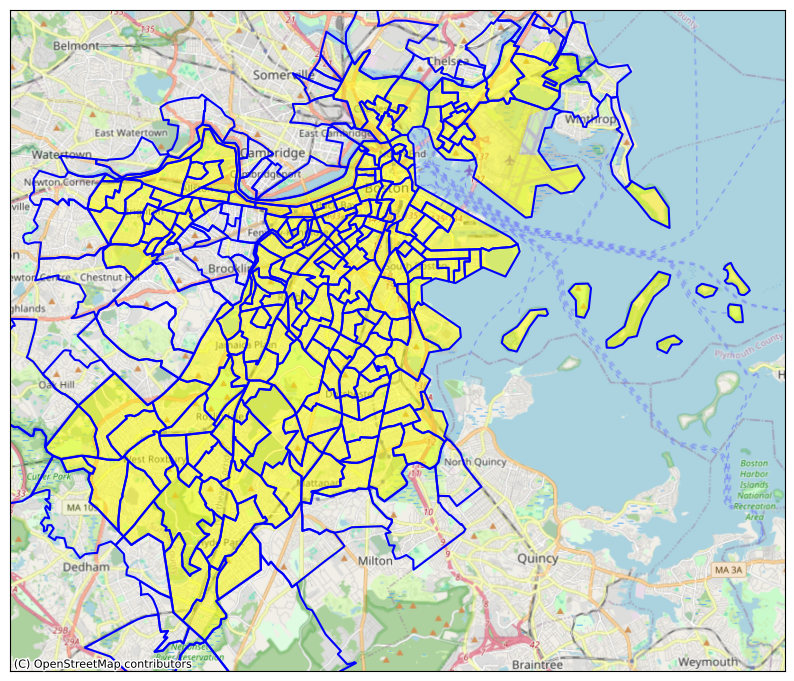

In [34]:
ax = cem.plot_map(
    gdf_boston, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_intersect.boundary,
    color="blue",
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Contained Entirely Within

In [35]:
gdf_within = gdf_ma_tracts.sjoin(gdf_boston, predicate="within")

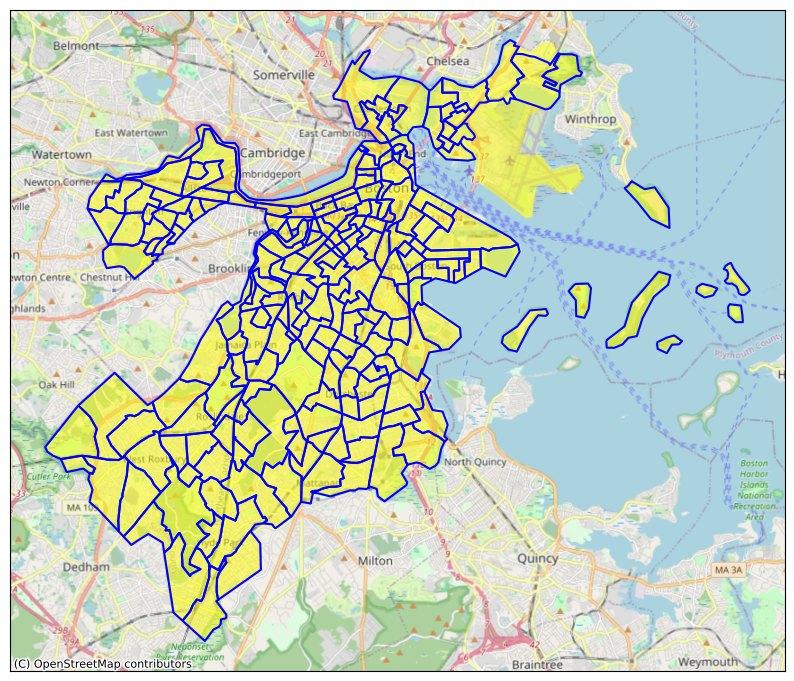

In [36]:
ax = cem.plot_map(
    gdf_boston, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_within.boundary,
    color="blue",
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### What about partial containment?

For example, "all tracts of which more than 80% of their area is in Boston?"

This is doable, but the devil is in the details:

- `with_geometry=True` returns geometry in lattitude and longitude.
- We need to project to meters (or feet) to properly compute area.
- The most accurate projection depends on where we are. Alaska and Florida are very different.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## `ced.contained_within`

A flexible API that handles all the details for us.

In [37]:
# We want tracts in Boston

gdf_boston_tracts = ced.contained_within(
    # The containing geometry:
    state=states.MA,
    place=BOSTON_CITY,
).download(
    # Normal `ced.download` args. But only return those in Boston.
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    tract="*",
)

In [38]:
gdf_boston_tracts.head()

STATE  PLACE COUNTY   TRACT  \
0    25  07000    025  000101   
1    25  07000    025  000102   
2    25  07000    025  000201   
3    25  07000    025  000202   
4    25  07000    025  000301   

                                               NAME  \
0  Census Tract 1.01, Suffolk County, Massachusetts   
1  Census Tract 1.02, Suffolk County, Massachusetts   
2  Census Tract 2.01, Suffolk County, Massachusetts   
3  Census Tract 2.02, Suffolk County, Massachusetts   
4  Census Tract 3.01, Suffolk County, Massachusetts   

                                                                                                                                                                                                  geometry  
0  POLYGON ((-71.1366 42.36016, -71.13627 42.3609, -71.13533 42.36318, -71.13309 42.36338, -71.13022 42.36269, -71.13042 42.36196, -71.12977 42.36107, -71.12888 42.36037, -71.13083 42.35902, -71.1314...  
1  POLYGON ((-71.1609 42.35862, -71.15399 42.35932, -71.14793 42.36064, -71.14617 42.36166, -71.14451 42.36293, -71.13955 42.3637, -71.13545 42.36485, -71.13533 42.36318, -71.13627 42.3609, -71.1366 ...  
2  POLYGON ((-71.16764 42.35379, -71.16502 42.35319, -71.16422 42.35552, -71.16278 42.35482, -71.16256 42.35553, -71.16177 42.35818, -71.1609 42.35862, -71.15469 42.35814, -71.15376 42.35752, -71.154...  
3  POLYGON ((-71.16056 42.35267, -71.15859 42.35381, -71.15806 42.35407, -71.15671 42.35474, -71.15614 42.35535, -71.15427 42.35607, -71.15376 42.35752, -71.15319 42.35723, -71.14908 42.35615, -71.15...  
4  POLYGON ((-71.17394 42.3534, -71.17139 42.35609, -71.1704 42.35712, -71.16947 42.35805, -71.16289 42.35795, -71.16177 42.35818, -71.16256 42.35553, -71.16278 42.35482, -71.16422 42.35552, -71.1650...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### `ced.contained_within` results

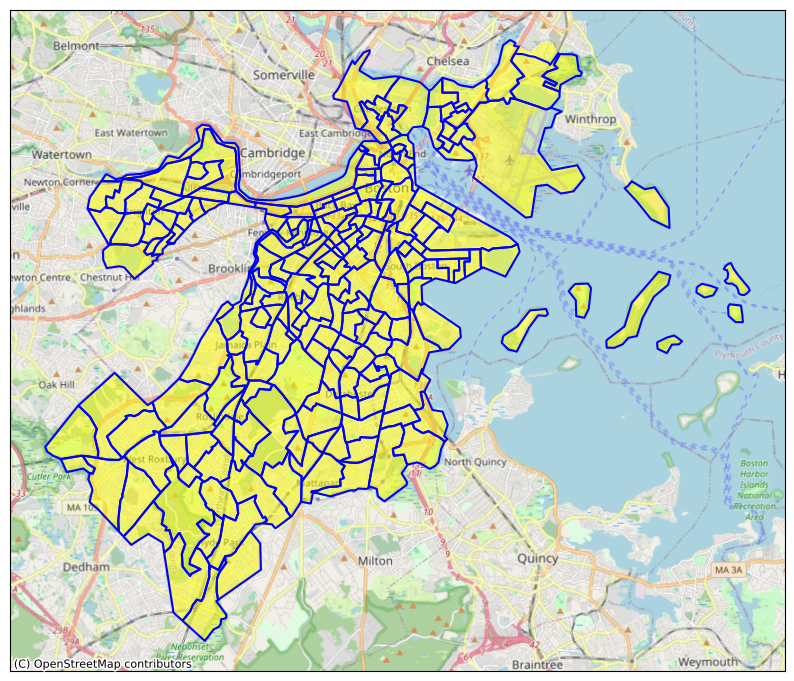

In [39]:
ax = cem.plot_map(
    gdf_boston, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_boston_tracts.boundary,
    color="blue",
    with_background=True,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Removing water from geometry.

This can make a big different in the appearance of maps for coastal areas.

In [40]:
gdf_boston_tracts_land = ced.contained_within(
    state=states.MA,
    place=BOSTON_CITY,
).download(
    # Normal `ced.download` args. But only return those in Boston.
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    tract="*",
    # Remove are that is water. This slows the query down, but results in better maps.
    remove_water=True,
)

In [41]:
gdf_boston_land = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    place=BOSTON_CITY,
    remove_water=True,
)

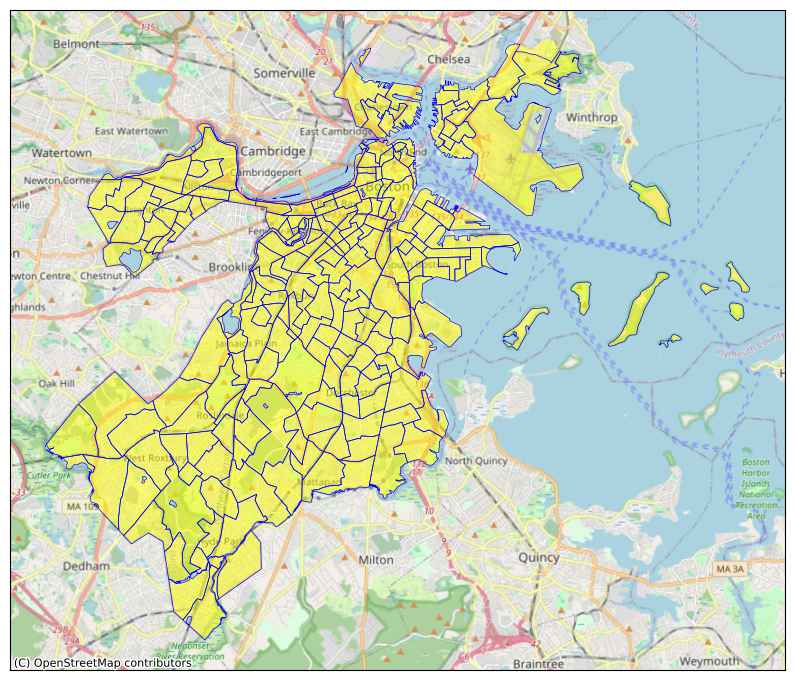

In [42]:
ax = cem.plot_map(
    gdf_boston_land, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_boston_tracts_land.boundary,
    color="blue",
    linewidth=0.5,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

# There is much more to `censusdis`

- Main repo: https://github.com/censusdis/censusdis/
  - Please watch and star
  - Open any feature requests as issues
- Tutorial repo: https://github.com/censusdis/censusdis-tutorial-2024/
    - Tutorial has extended lessons, exercises, and project ideas.
